# Ultimate MNIST Example
I know, I know... MNIST dataset has been used in all kind of examples about machine learning. However, when I was starting out, I didn't find any example that was simple enough to understand and complex enough to don't be too simplistic.

Although MNIST is old-fashioned, I think is a good place to start because it introduces the core fundamentals of machine learning and at the same time, it combines other necessary skills such as data manipulation and visualization. So I decided to build this simple model together with an explanation for new practitioners who can't find any good examples.

I throw in some jokes to make it lighter. All of them are pretty average, so expect a normal distribution of your laughs.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # I love seaborn aesthetics.

Using TensorFlow backend.


We will be using a keras *sequential* model for this example, along with *dense* and *flatten* layers. We will use *matplotlib* for plotting the performance metrics. *to_categorical* function and *numpy* will be useful for transforming the data.

I invite you to try other classification models and compare the results to get some insights. I recommend taking a look at the [scikit-learn](http://scikit-learn.org/) library for other models.

&nbsp;
&nbsp;
***
# Import the dataset and set the parameters
Without importing the dataset the project will become quite difficult so let's do that and then define the parameters we will be using for our model.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # https://keras.io/datasets/

num_epochs = 10
num_hidden_neurons = 50
num_classes = 10
validation = 0.3

&nbsp;
&nbsp;
***
# Explore the data
You will get tired of hearing that any good data science project starts by exploring the data. So... let's begin with that.

In [3]:
x_train # ALL of the digits.

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train[0] # A single, lonely, one.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train # Digit labels'.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
print('Train X and Y shapes: ', x_train.shape, y_train.shape)
print('Test X and Y shapes:  ', x_test.shape, y_test.shape)

Train X and Y shapes:  (60000, 28, 28) (60000,)
Test X and Y shapes:   (10000, 28, 28) (10000,)


In [7]:
x_train[0].shape # Shape of a single digit.

(28, 28)

Also, when working with images it's always useful to print them for being able to see the big picture (I told you the jokes were pretty average)

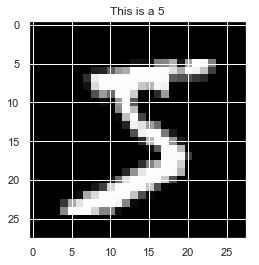

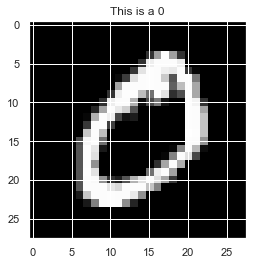

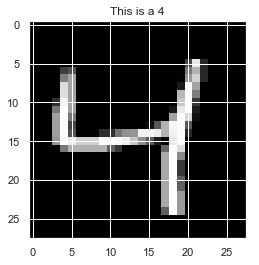

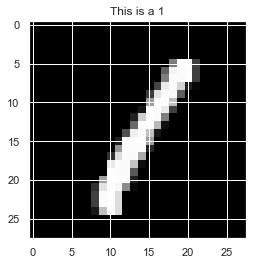

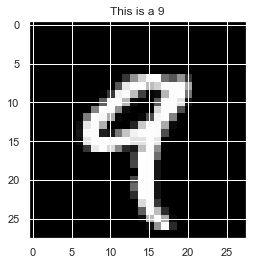

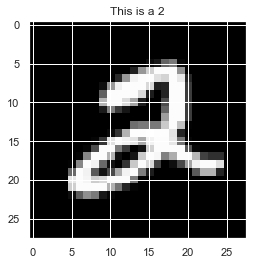

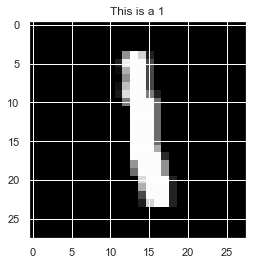

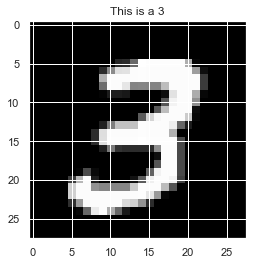

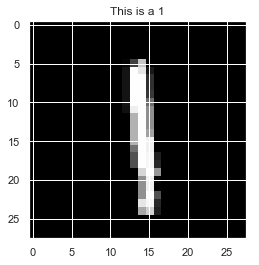

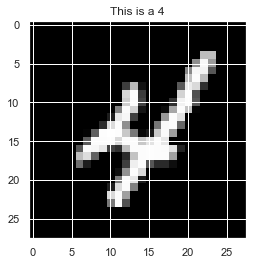

In [8]:
for digit, label in zip(x_train[:10], y_train[:10]):
    plt.imshow(digit, cmap='gray')
    plt.title('This is a {}'.format(label))
    plt.show()

&nbsp;
&nbsp;
***
# Reshape data for the model
Now that we understand how is the data, we can begin to transform it for making our job easier, and most importantly, possible.

In [9]:
# Normalize the values. (Pixel maximun val is 255)
x_train = x_train = x_train / 255
x_test = x_test = x_test / 255

In our MNIST data, 255 meant full brightness, while 0 was complete darkness and fear.

Unlike us, neural networks don't fear zeros, they dislike values that are too spread, so by dividing by 255 we are clamping all the values between 0 and 1. Our model will thank us later, don't worry.

Our target data is jealous, she also wants a new look.

In [10]:
# Convert ys to categoricals to match the number of neurons on the output layer.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Our model will predict probabilities for each number, so it needs to have each digit as a unique kind of row. In this case, the third number corresponds to a 2.

Using to_categorical makes this job easier, but watch out if you are building some kind of portfolio, because you won't be able to show off your fancy *numpy* tricks.

&nbsp;
&nbsp;
***
# Initialize the sequential model
Now that our data is finally ready, we can create the sequential model.

We will write a function to test a different number of layers and compare the results. The function isn't necessary, but later on, you will thank yourself for saving the extra work. (Also is useful to write functions like this one because it's the way to [tune your parameters](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/), but that tech is more advanced)

In [12]:
def make_model(num_layers=0):
    """
    Returns a compiled sequential model with a default hidden layer,
    followed by a specified number of hidden layers and an output one.
    """
    model = Sequential()
    
    # Add a flatten layer to reshape the array.
    model.add(Flatten())
    
    # Add num_layers of hidden layers.
    for i in range(num_layers):
        model.add(Dense(num_hidden_neurons, activation='relu'))
        
    # Add the output layer.
    model.add(Dense(num_classes, activation='softmax'))
    
    # Return the compiled model.
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

Jokes aside, this is an important step, so let's break it down:
- After instantiating our model we add a Flatten layer. This layer reshapes/flattens our data into a 1-D array. If we didn't use one, we will have to specify an input_dim/input_shape for our first hidden layer. The Flatten layer transforms our 28x28 input to a 784 single array.


- Then we add as many layers as the user specifies using the activation function named 'relu'. There are other functions but that explanation is beyond the scope of this notebook. However 'relu' is the most common one.


- The 'output' layer is also unique: it has as many neurons (outputs) as possible classes (digits). The activation 'softmax' allows us to output the probabilities of the prediction. Having probabilities is important because we can know which number it predicted and how confident the model is about that prediction.


- To conclude we compile the model, the parameters used here are too complicated to explain in detail. That being said, the keras documentation specifies them as the ones to use for this kind of classification: [Getting started with the Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/)

In [13]:
model = make_model()
history_1 = model.fit(x_train, y_train, validation_split=validation, epochs=num_epochs)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 106us/step - loss: 0.8825 - acc: 0.7959 - val_loss: 0.5477 - val_acc: 0.8677
Epoch 2/10
42000/42000 [==============================] - 3s 81us/step - loss: 0.5048 - acc: 0.8730 - val_loss: 0.4482 - val_acc: 0.8832
Epoch 3/10
42000/42000 [==============================] - 3s 80us/step - loss: 0.4384 - acc: 0.8840 - val_loss: 0.4084 - val_acc: 0.8886
Epoch 4/10
42000/42000 [==============================] - 3s 80us/step - loss: 0.4055 - acc: 0.8906 - val_loss: 0.3861 - val_acc: 0.8937
Epoch 5/10
42000/42000 [==============================] - 3s 80us/step - loss: 0.3849 - acc: 0.8953 - val_loss: 0.3707 - val_acc: 0.8980
Epoch 6/10
42000/42000 [==============================] - 3s 80us/step - loss: 0.3703 - acc: 0.8980 - val_loss: 0.3606 - val_acc: 0.9002
Epoch 7/10
42000/42000 [==============================] - 3s 81us/step - loss: 0.3592 - acc: 0.9005 - val_loss: 0.3518 - val_ac

As we can see our model was fitted successfully and we got an impressive 90% validation accuracy.

One thing to keep in mind: when you fit a model a History object is returned. These object's parameters contain information about the fitted model.

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/step


[0.3203577217102051, 0.912]

Using the evaluate method we can get more insight on how the model performs on new data. It returns the loss and the other metrics specified when the model was compiled, in this case, the accuracy.

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


It's always useful to see our model summary to check if everything is on point.

&nbsp;
&nbsp;
***
# Ploting the results
Now it's time to get fancy plotting our results with the power of matplotlib. We will define a function to make our job easier for later on.

In [16]:
def plot_results(History):
    ''' Plots the metrics of a model. '''
    for key in History.history.keys():
        plt.plot(range(1, num_epochs+1), History.history[key])
    
    plt.xlabel('epochs')
    plt.ylabel('score')
    plt.legend(list(History.history.keys()))
    plt.show()

One of the parameters of a History object is history. Despite sharing that awful same name, is quite useful because it contains the history (I'm sorry) of our trained model.

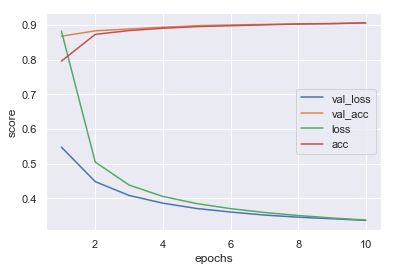

In [17]:
plot_results(history_1)

&nbsp;
&nbsp;
***
# Bonus
Now it's time to feel good about ourselves by using those pretty functions that we wrote. Let's see what happens with more layers!

(I'm really excited, you can tell by the '!')

In [18]:
model = make_model(num_layers=3)
history_2 = model.fit(x_train, y_train, validation_split=validation, epochs=num_epochs, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 108us/step - loss: 0.9168 - acc: 0.7420 - val_loss: 0.3875 - val_acc: 0.8862
Epoch 2/10
42000/42000 [==============================] - 4s 103us/step - loss: 0.3395 - acc: 0.9014 - val_loss: 0.3007 - val_acc: 0.9104
Epoch 3/10
42000/42000 [==============================] - 4s 103us/step - loss: 0.2764 - acc: 0.9200 - val_loss: 0.2569 - val_acc: 0.9246
Epoch 4/10
42000/42000 [==============================] - 4s 103us/step - loss: 0.2392 - acc: 0.9304 - val_loss: 0.2284 - val_acc: 0.9329
Epoch 5/10
42000/42000 [==============================] - 4s 103us/step - loss: 0.2102 - acc: 0.9386 - val_loss: 0.2301 - val_acc: 0.9292
Epoch 6/10
42000/42000 [==============================] - 4s 103us/step - loss: 0.1884 - acc: 0.9449 - val_loss: 0.1969 - val_acc: 0.9429
Epoch 7/10
42000/42000 [==============================] - 4s 103us/step - loss: 0.1698 - acc: 0.9505 - val_loss: 0.1817 - 

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 37us/step


[0.13918808237314223, 0.9559]

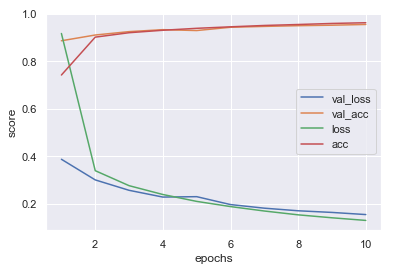

In [21]:
plot_results(history_2)

Hopefully, you have learned something at the same time that you cracked some laughs. 

Before you start sharing this nootebooks with all of your friends (if you have those), I recommend you to stretch this exercise further that I have done. Sometimes you will learn more by squeezing one single project than working on a handful of projects in a superficial manner.

So, here's a list of some improvements worth trying:
- Try to underfit and overfit the model and understand how your plots are affected
- Investigate ways to avoid overfitting. (Dropout layers are a good place to start)
- Plot more meaningful information about your models, for example, you could compare different models in the same plot
- Investigate convolutional networks and image proccessing for improving the model performance
- Look for parameter optimization on the link I provided above. (and [here](https://keras.io/getting-started/sequential-model-guide/))

Thanks for being here and don't forget to smile. Bye!

&nbsp;
&nbsp;
***